In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pygmsh

In [33]:
class Face:
    points = None
    triangleIndex = None
    #FaceIndex = None
    FkSigma = None
    d = None
    m = None
    
    def __init__(self, points, triangleIndex) :
        self.points = points
        self.triangleIndex = np.array([triangleIndex,-1])
        self.m = dist(points[0], points[1])

    def calcD(self, triangleMesh) :
        if(self.triangleIndex[1] == -1) :
            xK = triangleMesh[self.triangleIndex[0]].centroid
            self.d = np.abs((self.points[1][0] - self.points[0][0])*(self.points[0][1] - xK[1])- (self.points[0][0] - xK[0])*(self.points[1][1] - self.points[0][1]))/dist(self.points[0],self.points[1]) 
        else :
            xK = triangleMesh[self.triangleIndex[0]].centroid
            xL = triangleMesh[self.triangleIndex[1]].centroid
            self.d = dist(xK,xL)
        self.FKsigma = self.m/self.d
    
    def sameFace(self, otherFace) :
        t = (np.all(self.points[0] == otherFace.points[0]) and np.all(self.points[1] == otherFace.points[1])) or (np.all(self.points[1] == otherFace.points[0]) and np.all(self.points[0] == otherFace.points[1]))
        return t
    

class Triangle :
    points = None
    centroid = None
    centrePoint = None
    Faces = None
    index = None
    m = None
    
    
    def __init__(self, points, index) :
        self.points = points
        
        D = 2*(points[0][0]*(points[1][1] - points[2][1]) + points[1][0]*(points[2][1] - points[0][1]) + points[2][0]*(points[0][1] - points[1][1]))
        
        self.centroid = 1/D * np.array([(magnitude(points[0])**2)*(points[1][1]-points[2][1]) + (magnitude(points[1])**2)*(points[2][1]-points[0][1]) + (magnitude(points[2])**2)*(points[0][1]-points[1][1]),
                                           (magnitude(points[0])**2)*(points[2][0]-points[1][0]) + (magnitude(points[1])**2)*(points[0][0]-points[2][0]) + (magnitude(points[2])**2)*(points[1][0]-points[0][0])])
        self.centrePoint = (points[0]+points[1]+points[2])/3
        self.index = index
        self.Faces = np.empty(shape = 3, dtype = Face)
        self.Faces[0] = Face(np.array([points[0], points[1]]),index)
        self.Faces[1] = Face(np.array([points[1], points[2]]),index)
        self.Faces[2] = Face(np.array([points[2], points[0]]),index)
        self.m = 0.5*np.abs(points[0][0]*(points[1][1] - points[2][1]) + points[1][0]*(points[2][1] - points[0][1]) + points[2][0]*(points[0][1] - points[1][1]))
    
    def setIndex(self, index) :
        self.index = index
        for edge in self.Faces :
            edge.triangleIndex[0] = index
    def draw(self) :
        X = [self.points[0][0],self.points[1][0], self.points[2][0], self.points[0][0]]
        Y = [self.points[0][1],self.points[1][1], self.points[2][1], self.points[0][1]]
        plt.plot(X,Y, marker = 'o', color = 'black')
        plt.plot(self.centroid[0], self.centroid[1], marker = 'o', color = 'red')
        #fig = plt.gcf()
        #ax = fig.gca()
        #ax.add_patch(plt.Circle(self.centrePoint, dist(self.centrePoint,self.points[1]), color='b', fill = False))
        #fig.axes().set_aspect('equal')
        
    def InCircumScribedCircle(self,point) :
        testMatrix = np.array([[self.points[0][0],self.points[0][1], self.points[0][0]**2 + self.points[0][1]**2,1],
                  [self.points[1][0],self.points[1][1], self.points[1][0]**2 + self.points[1][1]**2,1],
                  [self.points[2][0],self.points[2][1], self.points[2][0]**2 + self.points[2][1]**2,1],
                  [point[0],point[1], point[0]**2 + point[1]**2,1]])
        return np.linalg.det(testMatrix) > 0


In [34]:
#DISTANCE FUNCTION
def dist(point1, point2) :
    return np.sqrt((point1[0] - point2[0])**2+(point1[1] - point2[1])**2)

def magnitude(point) :
    return dist(point, np.array([0,0]))
def orderCounterClockwise(points) :
    cpoint = (points[0]+points[1]+points[2])/3
    angles = np.zeros(3)
    for i in range(0,3): 
        angles[i] = np.arctan2(points[i][1] - cpoint[1],points[i][0]-cpoint[0])                    
    
    swap = True
    order = np.array(range(0,3))
    while swap :
        swap = False
        for i in range(0,2) :
            if(angles[i]  > angles[i+1]) :
                tempAngle = angles[i] 
                tempPoint = order[i]
                angles[i] = angles[i+1]
                order[i] = order[i+1]
                angles[i+1] = tempAngle
                order[i+1] = tempPoint
                swap = True
    
    return np.array( [points[order[0]],points[order[1]], points[order[2]]])
    
def pltTriangulation(triangulation):
    for i in range(0, len(triangulation)) :
            triangulation[i].draw()

    return fig = plt.gcf()
    #fig.axes().set_aspect('equal')
    #fig.xlim((0,1))
    #fig.ylim((0,1))

SyntaxError: invalid syntax (1425204941.py, line 33)

In [35]:
#implementation of Bowyer-Watson algorithm https://en.wikipedia.org/wiki/Bowyer%E2%80%93Watson_algorithm
#this creates Delauney Triangulations which is an admissible mesh

def BowyerWatson(points): 
    triangulation = np.empty(shape = 1, dtype = Triangle)
    superTriangle = Triangle(np.array([[-4,-2],[4,-2], [0,4]]),0) #makeSuperTriangle
    triangulation[0] = superTriangle
    index = 1
    
    for i in range(0,len(points)) :


        currentPoint = points[i]
        #print(currentPoint)
        badTriangles = np.empty(shape = 0, dtype = Triangle)

        for T in triangulation : #find badTriangles - triangles that break the Delauney condition
            if(T.InCircumScribedCircle(currentPoint)) :
                badTriangles = np.append(badTriangles,T)

        polygon = np.empty(shape = 0, dtype = Face)


        for T in badTriangles :
            for edge in T.Faces :
                sharedFace = False
                for T2 in badTriangles :
                    if(T2.index != T.index) :
                        for edge2 in T2.Faces:
                            if(edge.sameFace(edge2)):
                                sharedFace = True
                if(not sharedFace) :
                    polygon = np.append(polygon, edge) 

        for T in badTriangles :
            #print('bad triangle :',T.points )
            for k in range(0,len(triangulation)) :
                if(T == triangulation[k]):
                    triangulation = np.delete(triangulation, k)
                    break

        for edge in polygon :
            newPoints = orderCounterClockwise(np.array([edge.points[0], edge.points[1], currentPoint]))
            triangulation = np.append(triangulation, Triangle(newPoints, index))
            index+=1


    #return triangulation
    finalTriangulation = np.empty(shape = 0, dtype = Triangle)
    for T in triangulation :
        addTriangle = True
        for k in range(0,3) :
            for l in range(0,3) :
                if(np.all(T.points[k] == superTriangle.points[l])):
                    addTriangle = False
                    #print(T.points)
                    break
        if(addTriangle) :
            finalTriangulation = np.append(finalTriangulation,T)
            
    for k in range(0,len(finalTriangulation)):
        finalTriangulation[k].setIndex(k)
        
    for T1 in finalTriangulation :
        for T2 in finalTriangulation :
            if(T1 != T2) :
                for edge1 in T1.Faces :
                    for edge2 in T2.Faces :
                        if(edge1.sameFace(edge2)) :
                            edge1.triangleIndex[1] = T2.index
    for T in finalTriangulation :
        for edge in T.Faces :
            edge.calcD(finalTriangulation)
    return finalTriangulation


In [36]:
def generateRandomMesh(size) :
    with pygmsh.geo.Geometry() as geom:
        geom.add_polygon(
            [
                [0.0, 0.0],
                [1.0, 0.0],
                [1.0, 1.0],
                [0.0, 1.0],
            ],
            mesh_size=size,
        )
        mesh = geom.generate_mesh()
        return mesh.points[:,0:2] 


In [37]:
points = generateRandomMesh(0.15)
        
triangulation = BowyerWatson(points)

#print(len(points))
#print(len(triangulation))

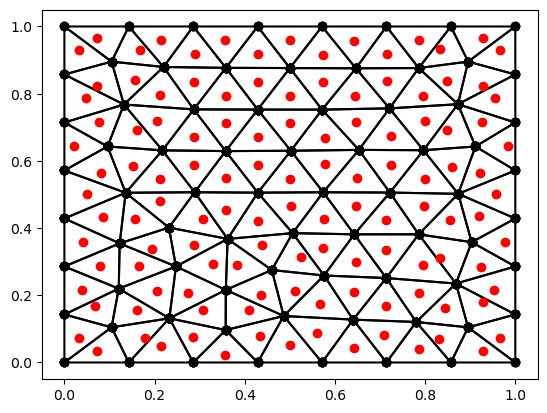

In [38]:
#DISPLAY TRIANGULATION 
fig = pltTriangulation(triangulation)
plt.savefig('mesh')
